In [1]:
# PLANCKOVA FUNKCIJA (1. teden)

In [2]:
# Naložimo potrebne knjižnice.
import numpy as np
import matplotlib.pyplot as plt

Planckovo funkcijo zapišemo kot:

$$
\frac{dj}{d\nu} = \frac{2h\nu^3}{c^2} \cdot \frac{1}{e^{\frac{h\nu}{k_B T}} - 1},
$$

kjer je $h$ Planckova konstanta, $c$ hitrost svetlobe, $k_B$ Boltzmannova konstanta, $\nu$ frekvenca svetlobe in $T$ temperatura.

Za dano valovno dolžino $\lambda$ in temperaturo $T$ izračunamo frekvenco svetlobe $\nu$ po formuli:

$$
\nu = \frac{c}{\lambda}.
$$

Nato vstavimo $\nu$ in $T$ v Planckovo funkcijo in dobimo spektralno gostoto sevanja $\frac{dj}{d\lambda}$:

$$
\frac{dj}{d\lambda}  = \frac{2hc^2}{\lambda^5} \cdot \frac{1}{e^{\frac{hc}{\lambda k_B T}} - 1}.
$$

Za primerjavo si oglejmo Planckovo funkcijo pri različnih temperaturah. Z uporabo knjižnic \textbf{numpy} in \textbf{matplotlib} bomo narisali graf spektralne gostote sevanja za različne temperature. Najprej bomo narisali za frekvenco, nato pa za valovno dolžino.

Postopek izračuna in risanja grafov je naslednji:
1. Definiramo konstante $h$, $c$ in $k_B$ in planckovo funkcijo.
2. Definiramo območje frekvenc $\nu$ oz. valovnih dolžin $\lambda$ in izbrane temperature.
3. Izračunamo in narišemo graf spektralne gostote sevanja za različne temperature.


In [3]:
# 1
# Najprej definirajmo konstante.
h = 6.62607015e-34  # Js
c = 299792458  # m/s
k = 1.380649e-23  # J/K

# Definirajmo funkcijo, ki izračuna Planckovo funkcijo. Najprej za frekvenco.
def planck_frekvenca(f, T):
    return 2 * h * f**3 / c**2 / (np.exp(h * f / k / T) - 1)

# In še za valovno dolžino.
def planck_valovna_dolzina(l, T):
    return 2 * h * c**2 / l**5 / (np.exp(h * c / l / k / T) - 1)


In [4]:
# 2
# Seznam frekvenc.
f = np.linspace(10**10, 4*10**15, 1000)  # Hz
# Seznam valovnih dolžin.
l = np.linspace(10**-8, 3*10**-6, 1000)  # m
# Seznam temperatur.
T = [3000, 5000, 8000, 10000]  # K

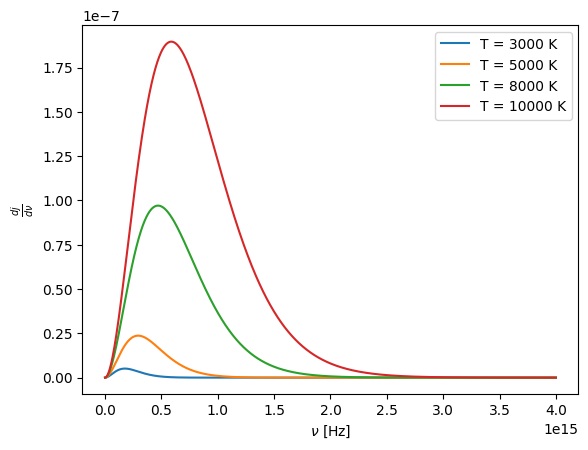

In [5]:
# 3a
# Preko for zanke izračunamo Planckovo funkcijo pri različnih temperaturah.
for i in T:
    plt.plot(f, planck_frekvenca(f, i), label='T = %s K' % i)

# Poimenujemo osi in dodamo legendo.
plt.xlabel('$\\nu$ [Hz]')
plt.ylabel('$\\frac{dj}{d\\nu}$')
plt.legend()

# Prikažemo graf.
plt.show()

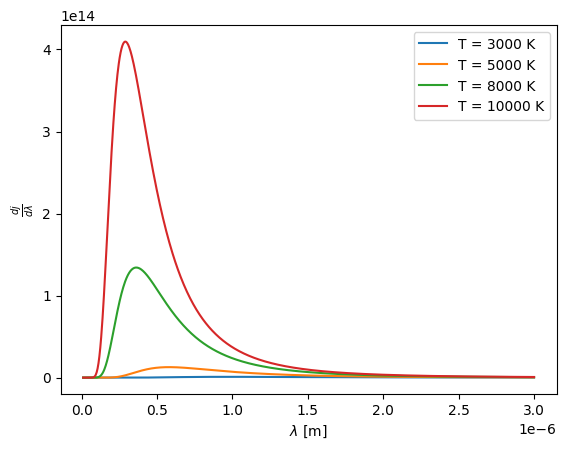

In [6]:
# 3b
# Preko for zanke izračunamo Planckovo funkcijo pri različnih temperaturah.
for i in T:
    plt.plot(l, planck_valovna_dolzina(l, i), label='T = %s K' % i)

# Poimenujemo osi in dodamo legendo.
plt.xlabel('$\\lambda$ [m]')
plt.ylabel('$\\frac{dj}{d\\lambda}$')
plt.legend()

# Preslikamo os x v logaritemsko skalo.
#plt.xscale('log')

# Prikažemo graf.
plt.show()

In [7]:
# Tukaj je še interaktivni prikaz Planckove funkcije, kjer lahko spreminjamo temperaturo.
# Najprej naložimo potrebne knjižnice.
from ipywidgets import interact, FloatSlider

# Fukcija, ki izriše Planckovo funkcijo za dano temperaturo.
def plot_planck(T):
    # Nastavimo območje valovnih dolžin.
    l = np.linspace(10**-8, 3*10**-6, 500)  # Valovne dolžine od 10 nm do 3000 nm.
    # Izračunamo Planckovo funkcijo.
    djdl = planck_valovna_dolzina(l, T)  # Planckova funkcija.
    
    # Narišemo graf.
    plt.figure(figsize=(10, 6))
    plt.plot(l * 10**9, djdl/10**(14), color='blue')
    # Dodamo oznake na graf.
    plt.xlabel('$\\lambda [nm]$')
    plt.ylabel('$\\frac{dj}{d\\lambda}$')
    # Nastavimo omejitve na x in y osi.
    plt.xlim(0, 3000)
    plt.ylim(0, 4.5)
    # Vključimo mrežo.
    plt.grid(True)
    
    # Označimo maksimum, ki se ga določi z Wienvim zakonom.
    Wien = 2.8977685 * 10**(-3) / T * 10**(9)
    plt.axvline(x=Wien, color='red', linestyle='--', label='Wien law')
    plt.text(Wien, 4.6, 'λ = %s nm' % round(Wien, 2), color='red', fontsize=12)
    plt.axhline(y=max(djdl/10**(14)), color='red', linestyle='--')
    plt.text(3005, max(djdl/10**(14)), '$(\\frac{dj}{d\\lambda})_{max} =$ %s $\\cdot 10^{14}$' % round(max(djdl/(10**(14))), 2), color='red', fontsize=12)
    # Narišemo še krivuljo, ki označuje maksimume.
    plt.plot(l * 10**9, 8.331504355156736*10**12 * (l* 10**9)**(-5) + 237643571003.3047/10**14, color='green', linestyle='--', label='$\\lambda^{-5}$')
    plt.show()

# Interaktivni prikaz.
interact(plot_planck,T=FloatSlider(value=5800, min=3000, max=10000, step=100, description='T [K]'))

interactive(children=(FloatSlider(value=5800.0, description='T [K]', max=10000.0, min=3000.0, step=100.0), Out…

<function __main__.plot_planck(T)>

Iz dane Planckove funkcije lahko izračunamo tudi gostoto svetlobnega toka, ki je enaka integralu Planckove funkcije

$$
j = \int_{0}^{\infty} \frac{dj}{d\lambda} d\lambda.
$$

Rešitev tega integrala poznamo saj vodi do Stefan-Boltzmannovega zakona, ki pravi, da je gostota svetlobnega toka sorazmerna s četrto potenco temperature:

$$
j = \sigma T^4,
$$

kjer je $\sigma$ Stefanova konstanta. Velikokrat pa opazujemo samo v določenem območju valovnih dolžin, kar pomeni, da se meje gornjega integrala spremenijo. V tem primeru je gostota svetlobnega toka enaka

$$
j = \int_{\lambda_1}^{\lambda_2} \frac{dj}{d\lambda} d\lambda.
$$

Integral je analitično nerešljiv, zato ga je potrebno 'rešiti' numerično. Če rešujemo na papir je najbolje reči, da je $d\lambda = \Delta \lambda$ in izračunamo gostoto svetlobnega toka kot

$$
j = \frac{dj}{d\lambda} \cdot \Delta \lambda.
$$

kjer je $\Delta \lambda = \lambda_2 - \lambda_1$. Treba se je zavedati, da je ta izračun približek, kako natančen je pa je odvisno od velikosti $\Delta \lambda$. Spodaj je prikazan tudi interaktivni primer, kako natančen je približek.

Če želimo narediti natančnejši izračun gostote svetlobnega toka, uporabimo numerično integracijo. V tem primeru lahko uporabimo funkcijo \textbf{quad} iz knjižnice \textbf{scipy.integrate}. Za vajo pa lahko napišemo preprosti integrator tudi sami.

In [8]:
# Preprosti integrator, ki uporablja trapezno metodo.
def integrator(f, h): # f je funkcija, ki jo integriramo, a in b sta meji integracije, h je korak
    vsota = 0
    for i in range(1, len(f)-1):
        vsota += (f[i] + f[i+1]) / 2 * h
    return vsota

# Numerični izračun gostote svetlobnega toka.
def gostota_svetlobnega_toka(l1, l2, T):
    # Nastavimo območje valovnih dolžin.
    l = np.linspace(l1, l2, 1000)  # Valovne dolžine od 10 nm do 3000 nm.
    # Izračunamo Planckovo funkcijo.
    djdl = planck_valovna_dolzina(l, T)  # Planckova funkcija.
    # Izračunamo gostoto svetlobnega toka.
    return integrator(djdl, l[1]-l[0])

# Numerični prbliže za gostoto svetlobnega toka.
def priblizek_gostote_svetlobnega_toka(l, dl, T):
    # Izračunamo Planckovo funkcijo.
    djdl = planck_valovna_dolzina(l, T)  # Planckova funkcija.
    # Izračunamo gostoto svetlobnega toka.
    return djdl * dl

# Izračunamo gostoto svetlobnega toka za Sonce pri l=600 nm in dl = 100 nm.
l = 600 * 10**-9  # m
dl = 100 * 10**-9  # m
j = gostota_svetlobnega_toka(l-dl/2, l+dl/2, 5800)
j_priblizek = priblizek_gostote_svetlobnega_toka(l, dl, 5800)

# Izpišemo rezultate.
print('Integrator: j = %s W/m^2.' % j)
print('Približek: j = %s W/m^2.' % j_priblizek)
# Napišemo še relativno napako.
print('Relativna napaka: %s.' % (abs(j-j_priblizek) / j))


Integrator: j = 2482557.5930774617 W/m^2.
Približek: j = 2492454.2147002835 W/m^2.
Relativna napaka: 0.003986462046406584.


Vidimo, da je uporabo približka lahko uporabna, če želimo hitro izračunati gostoto svetlobnega toka pri določenem območju valovnih dolžin. Na spodnjem interaktivnem primeru lahko spreminjamo meje valovnih dolžin in opazujemo, kako se spreminja natančnost približka. Pri uporabi približka moramo biti previdni, saj je ta natančen le v primeru, ko je območje, ki ga integriramo, zelo ozko. Uporaben je tudi v okolici maksimuma, pod pogojem da je $\Delta \lambda$ dovolj majhen.

In [30]:
# Funkcija za grafični prikaz preprostega približka.
def prikaz_priblizka(l1,l2,T):
    # Nastavimo območje valovnih dolžin.
    l = np.linspace(10, 3000, 500)  # Valovne dolžine od 10 nm do 3000 nm.
    # Izračunamo Planckovo funkcijo.
    djdl = planck_valovna_dolzina(l*10**(-9), T)  # Planckova funkcija.

    # Določimo dl in vrednost pri (l2-l1)/2.
    dl = l2 - l1
    djdl_sredina = planck_valovna_dolzina((l1+l2)/2*10**(-9), T)/10**(14)
    
    # Narišemo graf.
    plt.figure(figsize=(10, 6))
    plt.plot(l, djdl/10**(14), color='blue')
    # Dodamo oznake na graf.
    plt.xlabel('$\\lambda [nm]$')
    plt.ylabel('$\\frac{dj}{d\\lambda}$')
    # Nastavimo omejitve na x in y osi.
    plt.xlim(0, 3000)
    plt.ylim(0, np.max(djdl/10**(14))+0.1)
    # Vključimo mrežo.
    plt.grid(True)

    # Narišemo dve vertikalni črti, ki označujeta območje.
    plt.axvline(x=l1, color='gray')
    plt.axvline(x=l2, color='gray')
    # Pobarvamo območje. Najprej dejansko območje, nato pa približek.
    plt.fill_between(l, djdl/10**(14), where=(l >= l1) & (l <= l2), color='gray', alpha=0.5, hatch='x')
    plt.fill_between(l, djdl_sredina, where=(l >= l1) & (l <= l2), color='red', alpha=0.25)

    # Izračunamo gostoto svetlobnega toka in približek ter ga zapišemo na graf.
    j = gostota_svetlobnega_toka(l1*10**-9, l2*10**-9, T)
    j_priblizek = priblizek_gostote_svetlobnega_toka((l1+l2)/2*10**-9, dl*10**-9, T)
    # Get the top 
    plt.text(3025, 0.355, '$j_{integral} = %s$ W/m$^2$' % round(j, 2), color='black', fontsize=12)
    plt.text(3025, 0.355-0.02, '$j_{približek} = %s$ W/m$^2$' % round(j_priblizek, 2), color='red', fontsize=12)
    plt.text(3025, 0.355-0.04, 'Relativna napaka: %s' % round(abs(j-j_priblizek) / j, 4), color='black', fontsize=12)

    plt.show()

# Interaktivni prikaz.
interact(prikaz_priblizka, l1=FloatSlider(value=400, min=0, max=3000, step=50, description='l1 [nm]'),l2=FloatSlider(value=600, min=0, max=3000, step=50, description='l2 [nm]'), T=FloatSlider(value=5800, min=3000, max=10000, step=100, description='T [K]'))

interactive(children=(FloatSlider(value=400.0, description='l1 [nm]', max=3000.0, step=50.0), FloatSlider(valu…

<function __main__.prikaz_priblizka(l1, l2, T)>